In [1]:
#import and seed
import os
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
import seaborn as sns

sns.set(style="whitegrid")
np.random.seed(42)

os.makedirs("artifacts", exist_ok=True)


In [2]:
wildfire_paths = [
    "data/Measurement_station_info.csv",
    "data/1- cumulative-area-burnt-by-wildfires-by-week.csv",
    "data/2- annual-area-burnt-by-wildfires.csv",
    "data/3- share-of-the-total-land-area-burnt-by-wildfires-each-year.csv",
    "data/4- annual-area-burnt-per-wildfire.csv",
    "data/5- annual-burned-area-by-landcover.csv",
    "data/Measurement_info.csv",
    "data/Measurement_item_info.csv",
    "data/Measurement_station_info.csv",
    "data/AQI and Lat Long of Countries.csv",
    "/content/drive/MyDrive/wildfires.csv"
]

wf = None
for p in wildfire_paths:
    if os.path.exists(p):
        try:
            wf = pd.read_csv(p)
            print(f"Loaded wildfire dataset from {p}")
            break
        except Exception as e:
            print(f"Could not load {p}: {e}")

if wf is None:
    print("Wildfire dataset not found; using empty placeholder.")
    wf = pd.DataFrame()

print("wildfires.shape ->", wf.shape)
print("wildfires.columns ->", wf.columns.tolist())
display(wf.sample(5) if len(wf) else "No wildfire data available")


Loaded wildfire dataset from data/Measurement_station_info.csv
wildfires.shape -> (25, 5)
wildfires.columns -> ['Station code', 'Station name(district)', 'Address', 'Latitude', 'Longitude']


,Station code,Station name(district),Address,Latitude,Longitude
8,109,Dongdaemun-gu,"43, Cheonho-daero 13-gil, Dongdaemun-gu, Seoul...",37.575743,127.028885
16,117,Guro-gu,"45, Gamasan-ro 27-gil, Guro-gu, Seoul, Republi...",37.498498,126.889692
0,101,Jongno-gu,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008
23,124,Songpa-gu,"236, Baekjegobun-ro, Songpa-gu, Seoul, Republi...",37.502686,127.092509
11,112,Gangbuk-gu,"49, Samyang-ro 139-gil, Gangbuk-gu, Seoul, Rep...",37.647930,127.011952


In [3]:
aqi_paths = [
    "data/AQI and Lat Long of Countries.csv",
    "/content/drive/MyDrive/aqi.csv"
]

aq = None
for p in aqi_paths:
    if os.path.exists(p):
        try:
            aq = pd.read_csv(p)
            print(f"Loaded AQI dataset from {p}")
            break
        except Exception as e:
            print(f"Could not load {p}: {e}")

if aq is None:
    print("AQI dataset not found; using empty placeholder.")
    aq = pd.DataFrame()

print("aqi.shape ->", aq.shape)
print("aqi.columns ->", aq.columns.tolist())
display(aq.sample(5) if len(aq) else "No AQI data available")


Loaded AQI dataset from data/AQI and Lat Long of Countries.csv
aqi.shape -> (16695, 14)
aqi.columns -> ['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value', 'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category', 'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value', 'PM2.5 AQI Category', 'lat', 'lng']


,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
3601,Panama,San Miguelito,61,Moderate,1,Good,28,Good,3,Good,61,Moderate,9.0330,-79.5000
11097,China,Zhoukou,179,Unhealthy,3,Good,179,Unhealthy,2,Good,125,Unhealthy for Sensitive Groups,33.6250,114.6418
860,United States of America,Erlanger,67,Moderate,2,Good,35,Good,13,Good,67,Moderate,39.0109,-84.5864
15140,United States of America,Amherst,86,Moderate,2,Good,15,Good,19,Good,86,Moderate,42.8706,-71.6068
7035,United States of America,Norridge,62,Moderate,1,Good,27,Good,6,Good,62,Moderate,41.9637,-87.8231


In [5]:
if wf.shape[0] > 0:
    for c in wf.select_dtypes(include="object").columns:
        wf[c] = wf[c].astype(str).str.strip()

    # Parse dates
    date_cols = ["FIRE_YEAR", "DISCOVERY_DATE", "START_DATE", "DATE"]
    for col in date_cols:
        if col in wf.columns:
            wf["start_date"] = pd.to_datetime(wf[col], errors="coerce")
            break

    # Acres burned
    if "FIRE_SIZE" in wf.columns:
        wf["acres_burned"] = pd.to_numeric(wf["FIRE_SIZE"], errors="coerce")
        wf = wf[wf["acres_burned"] >= 0]

    # Keep only rows with lat/lon if present
    if {"LATITUDE","LONGITUDE"}.issubset(wf.columns):
        wf = wf[(wf["LATITUDE"].between(-90,90)) & (wf["LONGITUDE"].between(-180,180))]

    display(wf.head())


,Station code,Station name(district),Address,Latitude,Longitude
0,101,Jongno-gu,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008
1,102,Jung-gu,"15, Deoksugung-gil, Jung-gu, Seoul, Republic o...",37.564263,126.974676
2,103,Yongsan-gu,"136, Hannam-daero, Yongsan-gu, Seoul, Republic...",37.540033,127.004850
3,104,Eunpyeong-gu,"215, Jinheung-ro, Eunpyeong-gu, Seoul, Republi...",37.609823,126.934848
4,105,Seodaemun-gu,"32, Segeomjeong-ro 4-gil, Seodaemun-gu, Seoul,...",37.593742,126.949679


In [7]:
if aq.shape[0] > 0:
    for c in aq.select_dtypes(include="object").columns:
        aq[c] = aq[c].astype(str).str.strip()

    # Parse date
    for col in ["Date","date","DATE"]:
        if col in aq.columns:
            aq["date"] = pd.to_datetime(aq[col], errors="coerce")
            break

    # Numeric pollutant fields
    pollutant_candidates = ["PM2.5","PM10","O3","NO2"]
    for c in pollutant_candidates:
        if c in aq.columns:
            aq[c] = pd.to_numeric(aq[c], errors="coerce")

    display(aq.head())


,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900
2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-11.2958,-41.9869
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833


In [11]:
wf.columns

Index(['Station code', 'Station name(district)', 'Address', 'Latitude',
       'Longitude'],
      dtype='object')

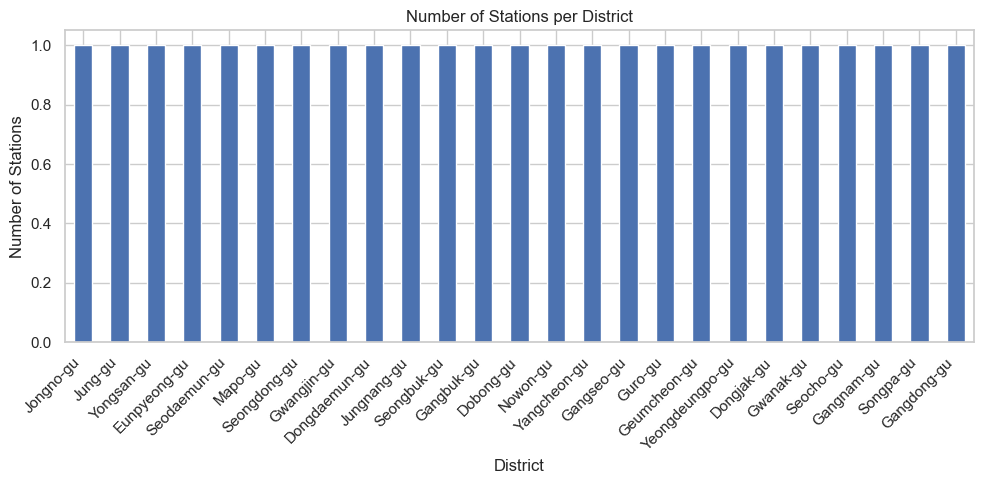

In [54]:
#Station name (district) – stations per district
wf['Station name(district)'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Number of Stations per District')
plt.xlabel('District')
plt.ylabel('Number of Stations')
plt.xticks(rotation=45, ha='right')
plt.savefig("artifacts/number_of_stations.png", dpi = 150 , bbox_inches="tight")
plt.tight_layout()
plt.show()

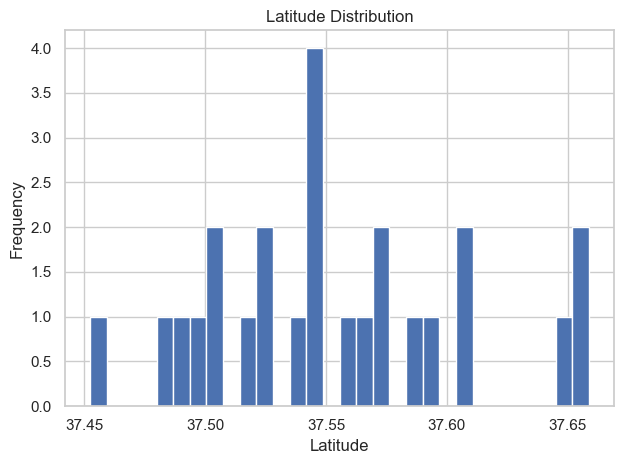

In [55]:
#Latitude – distribution
plt.hist(wf['Latitude'], bins=30)
plt.title('Latitude Distribution')
plt.xlabel('Latitude')
plt.ylabel('Frequency')
plt.savefig("artifacts/latitude_distribution.png", dpi = 150 , bbox_inches="tight")
plt.tight_layout()
plt.show()

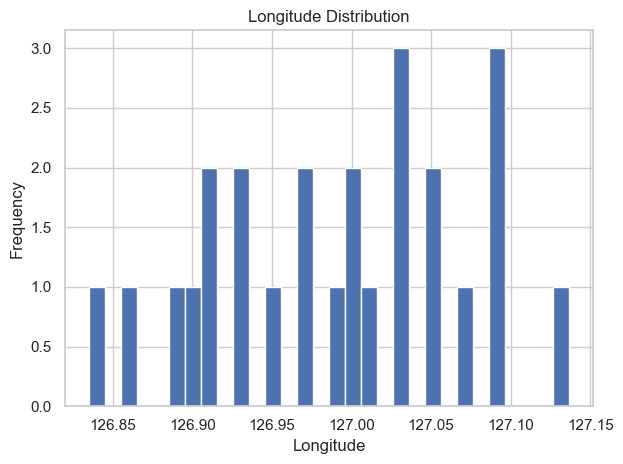

In [56]:
#Longitude – distribution
plt.hist(wf['Longitude'], bins=30)
plt.title('Longitude Distribution')
plt.xlabel('Longitude')
plt.ylabel('Frequency')
plt.savefig("artifacts/longitude_distribution.png", dpi = 150 , bbox_inches="tight")
plt.tight_layout()
plt.show()

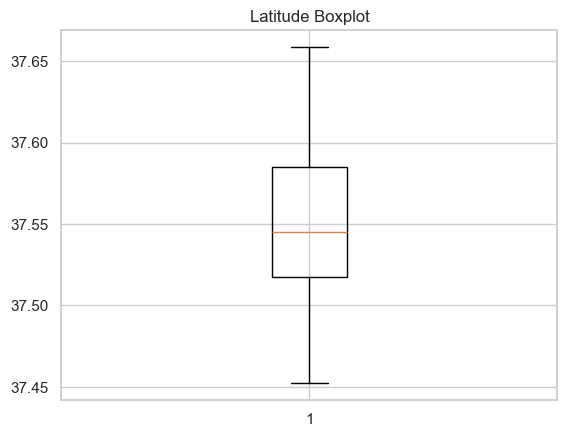

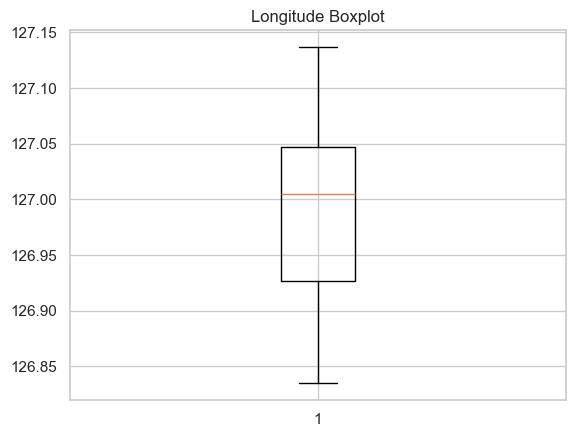

In [57]:
#Boxplots for geo validation
plt.boxplot(wf['Latitude'].dropna())
plt.title('Latitude Boxplot')
plt.show()

plt.boxplot(wf['Longitude'].dropna())
plt.title('Longitude Boxplot')
plt.savefig("artifacts/geo_validation.png", dpi = 150 , bbox_inches="tight")
plt.show()


In [28]:
aq.columns

Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value',
       'PM2.5 AQI Category', 'lat', 'lng'],
      dtype='object')

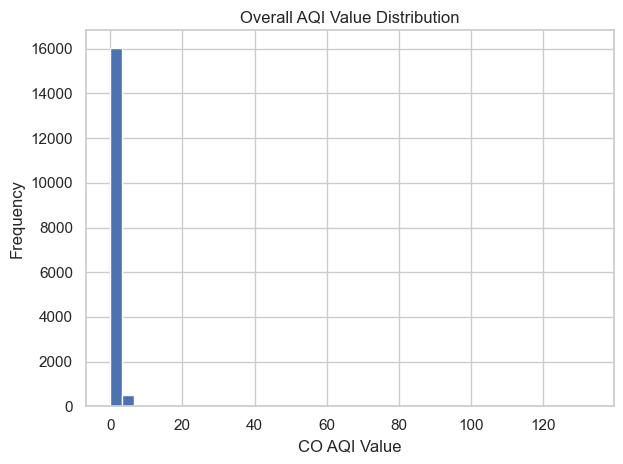

In [59]:
#AQI Value distribution (overall air quality spread)
plt.hist(aq['CO AQI Value'], bins=40)
plt.title('Overall AQI Value Distribution')
plt.xlabel('CO AQI Value')
plt.ylabel('Frequency')
plt.savefig("artifacts/AQI value distribution.png", dpi = 150 , bbox_inches="tight")
plt.tight_layout()
plt.show()


In [33]:
print(aq.columns.tolist())

['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value', 'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category', 'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value', 'PM2.5 AQI Category', 'lat', 'lng']


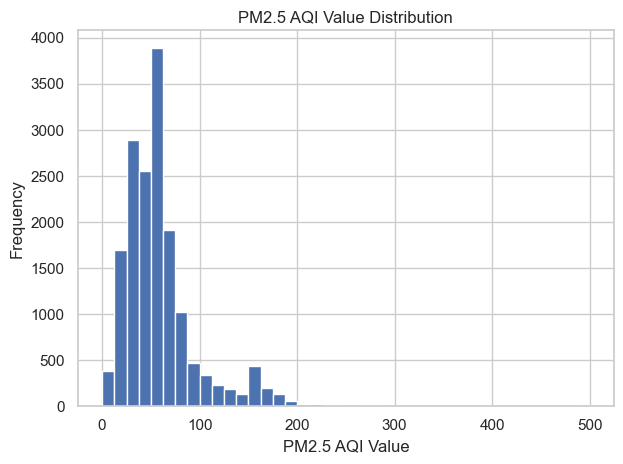

In [60]:
#AQI Value distribution 
plt.hist(aq['PM2.5 AQI Value'].dropna(), bins=40)
plt.title('PM2.5 AQI Value Distribution')
plt.xlabel('PM2.5 AQI Value')
plt.ylabel('Frequency')
plt.savefig("artifacts/PM2.5_distribution.png", dpi = 150 , bbox_inches="tight")
plt.tight_layout()
plt.show()

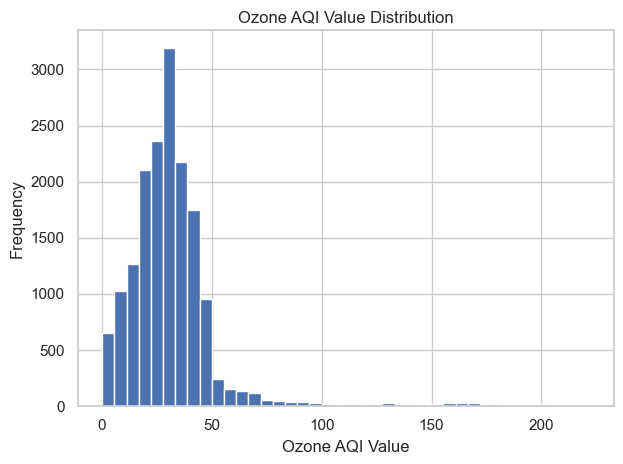

In [61]:
#Ozone AQI Value distribution
plt.hist(aq['Ozone AQI Value'].dropna(), bins=40)
plt.title('Ozone AQI Value Distribution')
plt.xlabel('Ozone AQI Value')
plt.ylabel('Frequency')
plt.savefig("artifacts/ozone_aqi_distribution.png", dpi = 150 , bbox_inches="tight")
plt.tight_layout()
plt.show()

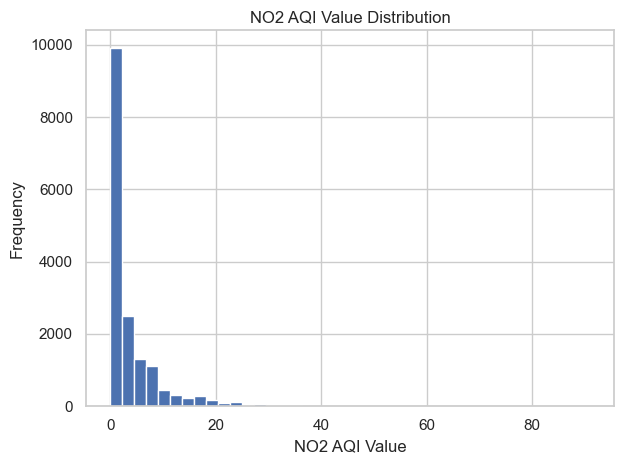

In [62]:
#NO2 AQI Value distribution
plt.hist(aq['NO2 AQI Value'].dropna(), bins=40)
plt.title('NO2 AQI Value Distribution')
plt.xlabel('NO2 AQI Value')
plt.ylabel('Frequency')
plt.savefig("artifacts/no2_aqi_distribution.png", dpi = 150 , bbox_inches="tight")
plt.tight_layout()
plt.show()

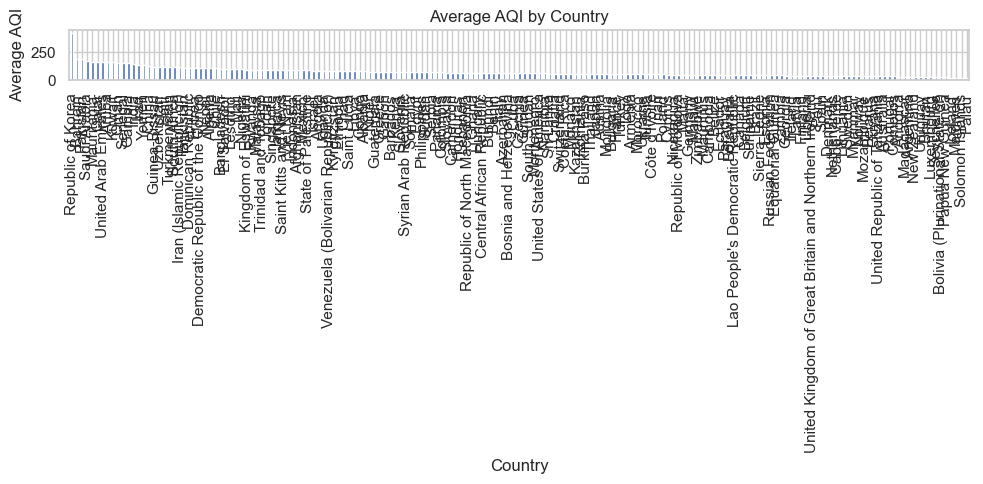

In [63]:
#Country-wise AQI comparison
aq.groupby('Country')['AQI Value'].mean().sort_values(ascending=False).plot(
    kind='bar', figsize=(10,5)
)
plt.title('Average AQI by Country')
plt.xlabel('Country')
plt.ylabel('Average AQI')
plt.savefig("artifacts/Avg_AQI_distribution.png", dpi = 150 , bbox_inches="tight")
plt.tight_layout()
plt.show()

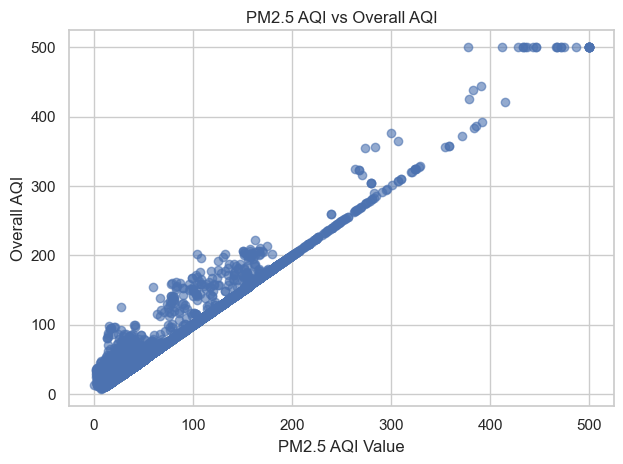

In [64]:
#PM2.5 vs Overall AQI
plt.scatter(
    aq['PM2.5 AQI Value'],
    aq['AQI Value'],
    alpha=0.6
)
plt.title('PM2.5 AQI vs Overall AQI')
plt.xlabel('PM2.5 AQI Value')
plt.ylabel('Overall AQI')
plt.savefig("artifacts/PM2.5_distribution.png", dpi = 150 , bbox_inches="tight")
plt.tight_layout()
plt.show()


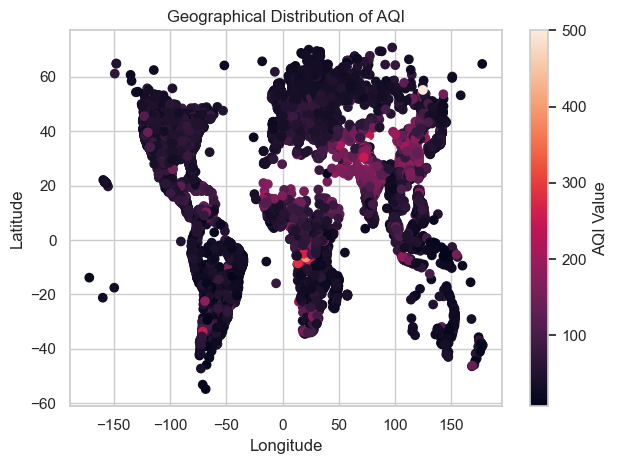

In [65]:
#Geographical AQI scatter (lat-lng)
plt.scatter(
    aq['lng'],
    aq['lat'],
    c=aq['AQI Value']
)
plt.colorbar(label='AQI Value')
plt.title('Geographical Distribution of AQI')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig("artifacts/Geographical Distribution of AQI.png", dpi = 150 , bbox_inches="tight")
plt.tight_layout()
plt.show()


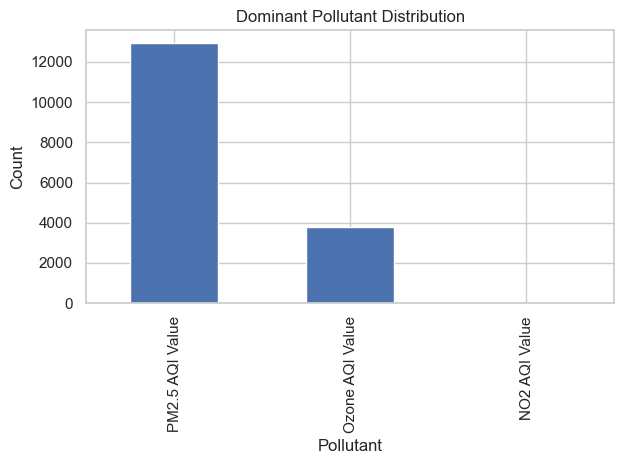

In [66]:
#Dominant pollutant
pollutants = aq[
    ['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']
]

aq['Dominant Pollutant'] = pollutants.idxmax(axis=1)

aq['Dominant Pollutant'].value_counts().plot(kind='bar')
plt.title('Dominant Pollutant Distribution')
plt.xlabel('Pollutant')
plt.ylabel('Count')
plt.savefig("artifacts/dominant_pollutant_distribution.png", dpi = 150 , bbox_inches="tight")
plt.tight_layout()
plt.show()


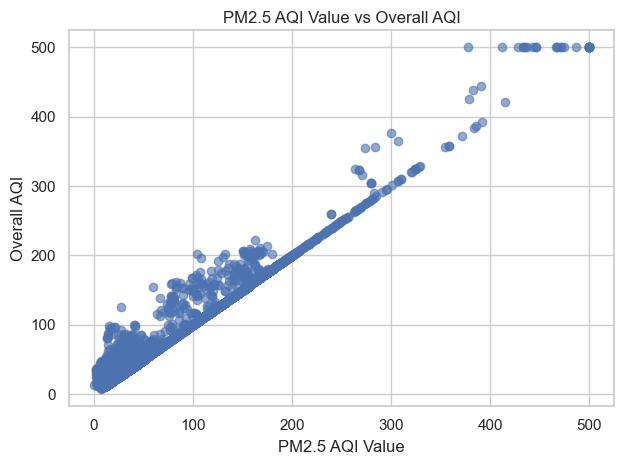

In [67]:
#PM2.5 AQI vs Overall AQI
plt.scatter(
    aq['PM2.5 AQI Value'],
    aq['AQI Value'],
    alpha=0.6
)
plt.title('PM2.5 AQI Value vs Overall AQI')
plt.xlabel('PM2.5 AQI Value')
plt.ylabel('Overall AQI')
plt.savefig("artifacts/PM2.5 AQI Value vs Overall AQI.png", dpi = 150 , bbox_inches="tight")
plt.tight_layout()
plt.show()

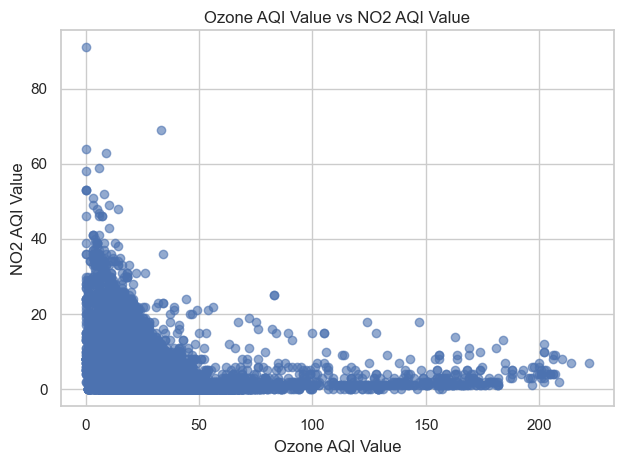

In [68]:
#Ozone AQI vs NO2 AQI
plt.scatter(
    aq['Ozone AQI Value'],
    aq['NO2 AQI Value'],
    alpha=0.6
)
plt.title('Ozone AQI Value vs NO2 AQI Value')
plt.xlabel('Ozone AQI Value')
plt.ylabel('NO2 AQI Value')
plt.savefig("artifacts/Ozone AQI Value vs NO2 AQI Value.png", dpi = 150 , bbox_inches="tight")
plt.tight_layout()
plt.show()


C:\Users\athar\AppData\Local\Temp\ipykernel_10236\3649589862.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


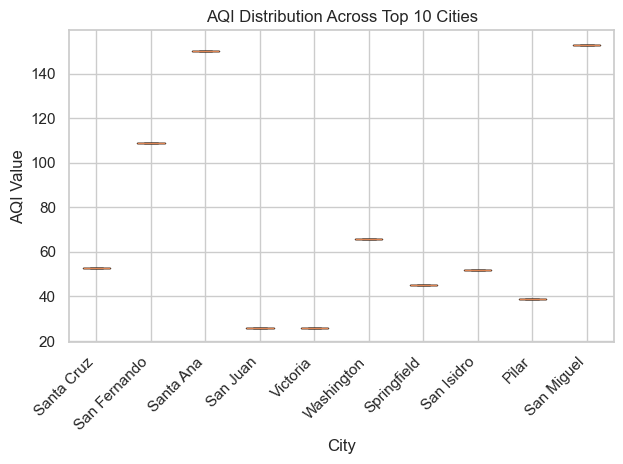

In [47]:
#City-wise AQI comparison
top_cities = aq['City'].value_counts().head(10).index
subset = aq[aq['City'].isin(top_cities)]

plt.boxplot(
    [subset[subset['City'] == c]['AQI Value'] for c in top_cities],
    labels=top_cities
)
plt.title('AQI Distribution Across Top 10 Cities')
plt.xlabel('City')
plt.ylabel('AQI Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [51]:
#Save cleaned snapshots
if wf.shape[0] > 0:
    wf.to_csv("artifacts/wildfires_cleaned.csv", index=False)
    print("Saved wildfire cleaned snapshot.")

if aq.shape[0] > 0:
    aq.to_csv("artifacts/aqi_cleaned.csv", index=False)
    print("Saved AQI cleaned snapshot.")

Saved wildfire cleaned snapshot.
Saved AQI cleaned snapshot.
